#### Pedestrian Auto Crashes Analysis

In [9]:
# read in the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file = pd.read_csv('ped_crashes.csv')
file2 = pd.read_csv('ped_crashes.csv')
print(file.head())

   Crash Year Crash Month  Crash Day            Time of Day Day of Week  \
0        2018    February          1     9:00 AM - 10:00 AM    Thursday   
1        2018    February          1      7:00 PM - 8:00 PM    Thursday   
2        2018    February          1  11:00 AM - 12:00 noon    Thursday   
3        2018    February          1      6:00 PM - 7:00 PM    Thursday   
4        2018       March          1      2:00 PM - 3:00 PM    Thursday   

        City or Township     Crash: Intersection Crash: Hit-and-Run  \
0  Wayne County: Detroit  Not intersection crash        Hit-and-run   
1  Wayne County: Detroit  Not intersection crash        Hit-and-run   
2  Wayne County: Detroit      Intersection crash        Hit-and-run   
3  Wayne County: Detroit      Intersection crash        Hit-and-run   
4  Wayne County: Detroit  Not intersection crash        Hit-and-run   

  Lighting Conditions Weather Conditions (2016+) Speed Limit at Crash Site  \
0            Daylight                      C

In [3]:
# last 5 rows
file.tail()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
6804,2010,July,31,2:00 AM - 3:00 AM,Saturday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,Uncoded & errors,25,Fatal injury (K),Motor vehicle driver,DOB invalid,Uncoded & errors
6805,2010,August,31,2:00 PM - 3:00 PM,Tuesday,Wayne County: Livonia,Intersection crash,Not hit-and-run,Daylight,Uncoded & errors,40,Suspected minor injury (B),Motor vehicle driver,22,Female
6806,2010,October,31,8:00 PM - 9:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Uncoded & errors,15,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
6807,2010,December,31,1:00 PM - 2:00 PM,Friday,Wayne County: Wayne,Intersection crash,Hit-and-run,Daylight,Uncoded & errors,35,Possible injury (C),Motor vehicle driver,DOB invalid,Male
6808,2010,December,31,10:00 PM - 11:00 PM,Friday,Wayne County: Dearborn,Not intersection crash,Not hit-and-run,Dark lighted,Uncoded & errors,35,Possible injury (C),Motor vehicle driver,55,Male


In [4]:
# dataset column names
print(file.columns)
print("")
# dataset total rows and columns
print(file.shape)
print("")
# dimensions
print(file.ndim)

Index(['Crash Year', 'Crash Month', 'Crash Day', 'Time of Day', 'Day of Week',
       'City or Township', 'Crash: Intersection', 'Crash: Hit-and-Run',
       'Lighting Conditions', 'Weather Conditions (2016+)',
       'Speed Limit at Crash Site', 'Worst Injury in Crash', 'Party Type',
       'Person Age', 'Person Gender'],
      dtype='object')

(6809, 15)

2


In [5]:
print("Standard Statistics")
print(file.describe())
print("")

print("Information on the Columns")
print(file.info())
print("")

print("Data Types")
print(file.dtypes)

Standard Statistics
        Crash Year    Crash Day
count  6809.000000  6809.000000
mean   2013.992216    15.384197
std       2.597471     8.701025
min    2010.000000     1.000000
25%    2012.000000     8.000000
50%    2014.000000    15.000000
75%    2016.000000    23.000000
max    2018.000000    31.000000

Information on the Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Crash Year                  6809 non-null   int64 
 1   Crash Month                 6809 non-null   object
 2   Crash Day                   6809 non-null   int64 
 3   Time of Day                 6809 non-null   object
 4   Day of Week                 6809 non-null   object
 5   City or Township            6809 non-null   object
 6   Crash: Intersection         6809 non-null   object
 7   Crash: Hit-and-Run          6809 non-null   obje

In [6]:
#dropping Party Type columns
file.drop('Party Type', axis=1)

#dropping "Uncoded & errors" in the Person Gender column
file.drop(file.loc[file['Person Gender']=='Uncoded & errors'].index, inplace=True)

# cleaning
file['Speed Limit at Crash Site'] = file['Speed Limit at Crash Site'].str.replace('Uncoded & errors', '0')
file['Speed Limit at Crash Site'].astype(int).sort_values().unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

Not intersection crash    3852
Intersection crash        2957
Name: Crash: Intersection, dtype: int64


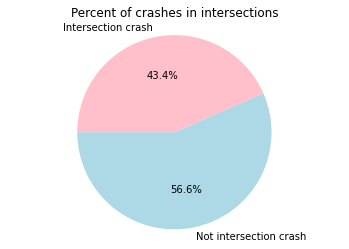

-------------------------------------------------------------------------------


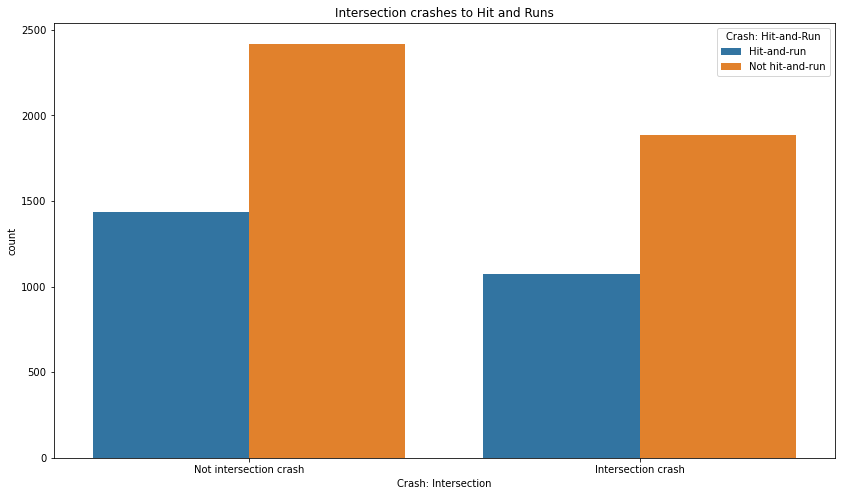

In [7]:
# Accidents on a Intersection

intersectiondf = file2['Crash: Intersection'].value_counts()
print(intersectiondf)

insectionlabels = ['Not intersection crash','Intersection crash']
values = list(intersectiondf)
colors = ['lightblue','pink']
plt.title('Percent of crashes in intersections')
plt.pie(values,labels=insectionlabels,colors=colors,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

print("-------------------------------------------------------------------------------")

plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Crash: Intersection', hue='Crash: Hit-and-Run', data=file2)
plt.title("Intersection crashes to Hit and Runs")
plt.show()

Accident Count Based on Day of Week
           Day of Week  Day_id
Monday             681       0
Tuesday            759       1
Wednesday          753       2
Thursday           764       3
Friday             778       4
Saturday           675       5
Sunday             488       6


Accident Count Based on Injury Severity
Possible injury (C)             1814
Suspected minor injury (B)      1259
Suspected serious injury (A)     797
No injury (O)                    655
Fatal injury (K)                 373


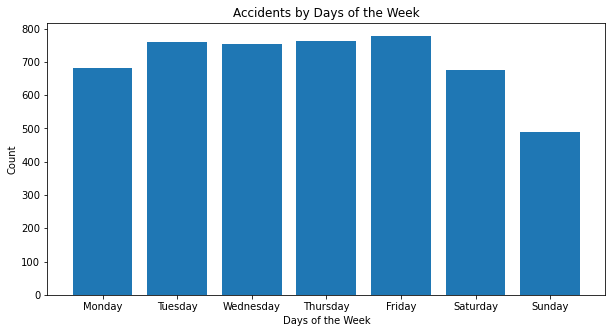

In [8]:
# bar plot for Days of the Week
print("Accident Count Based on Day of Week")
days_count = file['Day of Week'].value_counts()
# turn days_count into a dataframe
days_count = days_count.to_frame()
# Day Sorter
sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sort,range(len(sort))))

# add day ID
days_count['Day_id'] = days_count.index
days_count['Day_id'] = days_count['Day_id'].map(sorterIndex)

# sort by day ID
days_count.sort_values('Day_id', inplace=True)
print(days_count.to_string())


print("")
print("")
#severity
print("Accident Count Based on Injury Severity")
sev_count = file['Worst Injury in Crash'].value_counts()
print(sev_count.to_string())

# plotting correct graph
plt.figure(figsize = (10,5))
plt.title("Accidents by Days of the Week")
plt.xlabel('Days of the Week')
plt.ylabel('Count')
plt.bar(days_count['Day_id'], days_count['Day of Week'])
plt.xticks([0,1,2,3,4,5,6], sort)
plt.show()

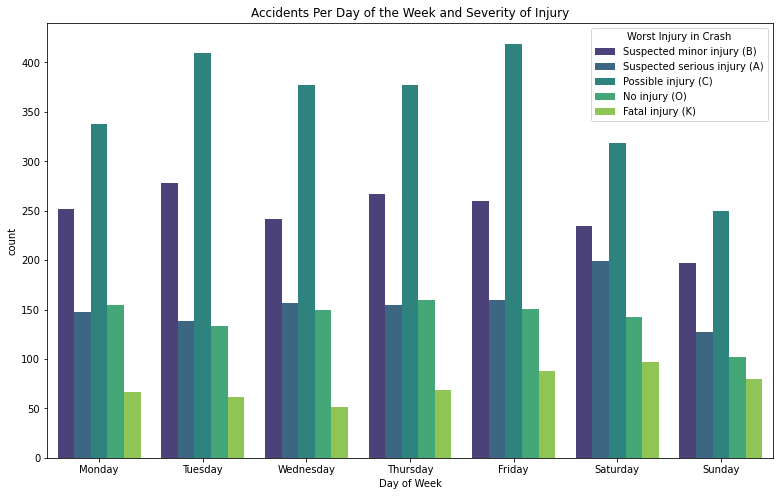

In [30]:
file1 = file
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(13, 8))
ax = sns.countplot(x='Day of Week', order=week, hue='Worst Injury in Crash', data=file1, palette='viridis')
plt.title("Accidents Per Day of the Week and Severity of Injury")
plt.show()

6:00 PM - 7:00 PM            535
7:00 PM - 8:00 PM            498
5:00 PM - 6:00 PM            491
3:00 PM - 4:00 PM            461
4:00 PM - 5:00 PM            452
8:00 PM - 9:00 PM            439
9:00 PM - 10:00 PM           353
2:00 PM - 3:00 PM            342
10:00 PM - 11:00 PM          336
7:00 AM - 8:00 AM            314
11:00 PM - 12:00 midnight    289
12:00 noon - 1:00 PM         273
1:00 PM - 2:00 PM            270
8:00 AM - 9:00 AM            233
11:00 AM - 12:00 noon        231
10:00 AM - 11:00 AM          195
2:00 AM - 3:00 AM            184
12:00 midnight - 1:00 AM     177
9:00 AM - 10:00 AM           165
1:00 AM - 2:00 AM            159
6:00 AM - 7:00 AM            147
5:00 AM - 6:00 AM             93
3:00 AM - 4:00 AM             89
4:00 AM - 5:00 AM             77
Unknown                        6
Name: Time of Day, dtype: int64


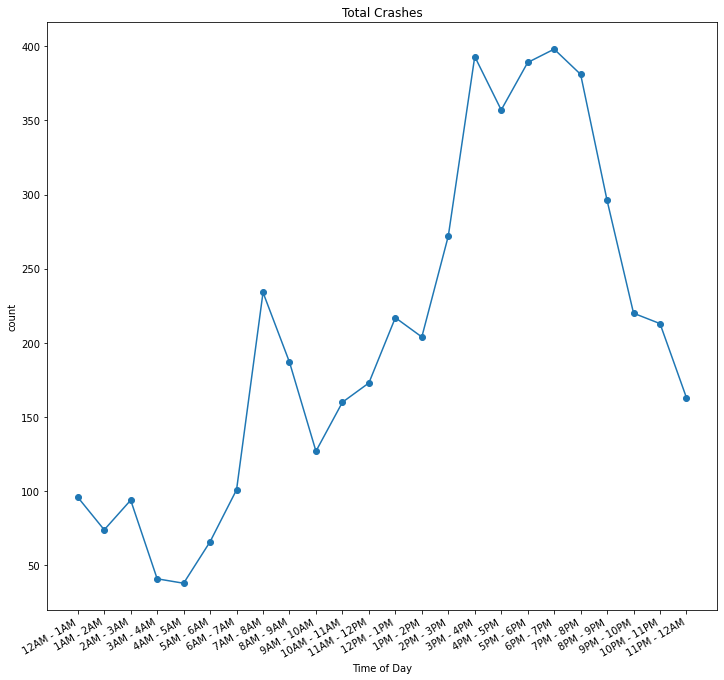

In [61]:
from pylab import rcParams
time_count = file['Time of Day'].value_counts()
print(time_count)

count = [96,74,94,41,38,66,101,234,187,127,160,173,217,204,272,393,357,389,398,381,296,220,213,163]

Time = ['12AM - 1AM','1AM - 2AM','2AM - 3AM','3AM - 4AM','4AM - 5AM','5AM - 6AM','6AM - 7AM','7AM - 8AM','8AM - 9AM','9AM - 10AM','10AM - 11AM','11AM - 12PM','12PM - 1PM','1PM - 2PM','2PM - 3PM','3PM - 4PM','4PM - 5PM','5PM - 6PM','6PM - 7PM','7PM - 8PM','8PM - 9PM','9PM - 10PM','10PM - 11PM','11PM - 12AM']

plt.plot_date(Time,count, linestyle='solid' )
def cm_to_inch(value):
    return value/2.54
# Formatting the date on the axis
plt.gcf().autofmt_xdate()# is used to rotate them and right align them.
plt.title('Total Crashes')
plt.xlabel('Time of Day')
plt.ylabel('count')

rcParams['figure.figsize'] = 12, 12
plt.show()

Counter for Accidents by Year
{2010: 755, 2011: 797, 2012: 707, 2013: 788, 2014: 765, 2015: 801, 2016: 651, 2017: 723, 2018: 822}


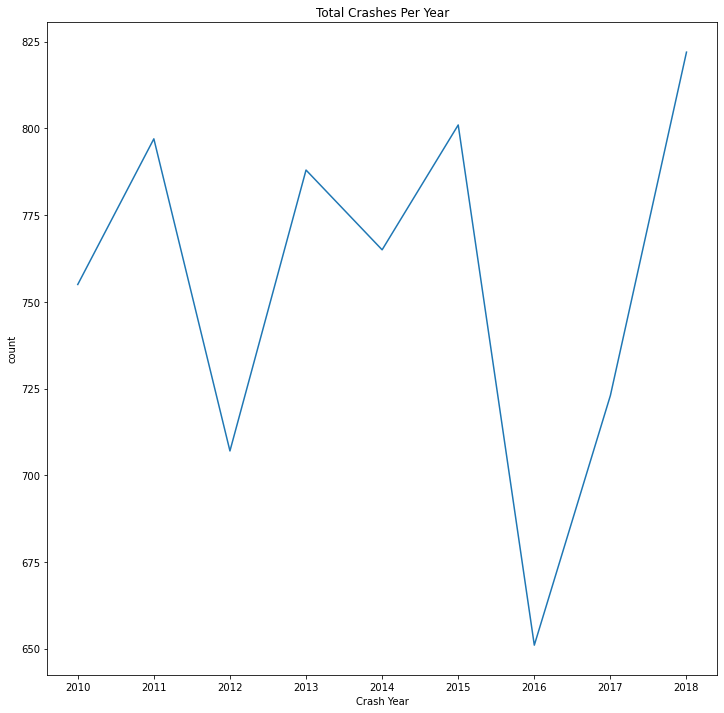

In [58]:
# Accidents by Year
print("Counter for Accidents by Year")
crashes_year = file2["Crash Year"].value_counts()
new_crash = crashes_year.sort_index()
c = new_crash.to_dict()
print(c)
from pylab import rcParams
y = c.values()
x = c.keys()

plt.plot(x,y)

plt.title("Total Crashes Per Year")
plt.xlabel("Crash Year")
plt.ylabel("count")

rcParams["figure.figsize"]= 12,12
plt.show()

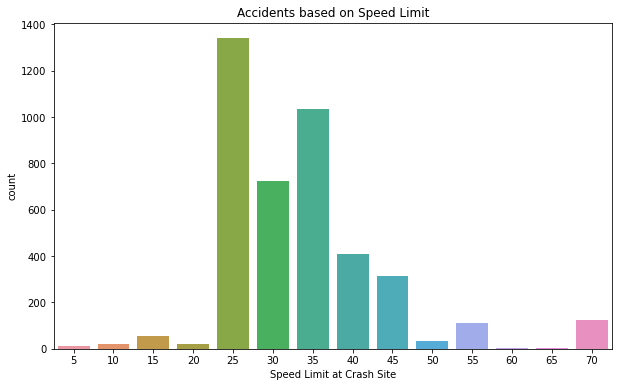

<AxesSubplot:xlabel='Speed Limit at Crash Site', ylabel='Density'>

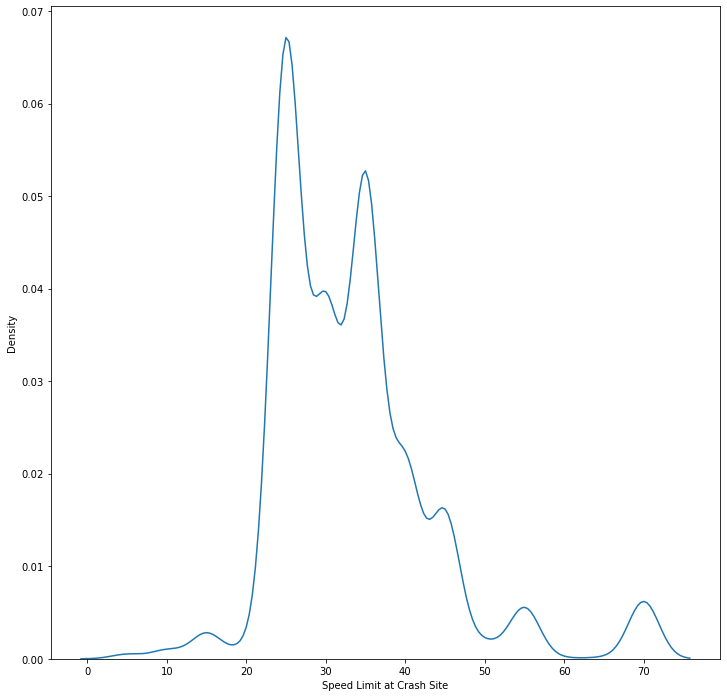

In [32]:
plt.figure(figsize=(10, 6))
file['Speed Limit at Crash Site'] = file['Speed Limit at Crash Site'].astype(int)
file = file[file['Speed Limit at Crash Site'] > 0]
speedLimitSorted = sorted(file['Speed Limit at Crash Site'].unique())
ax = sns.countplot(x='Speed Limit at Crash Site', order=speedLimitSorted, data=file)
plt.title("Accidents based on Speed Limit")

plt.show()
plt.clf()
sns.kdeplot(data=file, x="Speed Limit at Crash Site")

<AxesSubplot:xlabel='Speed Limit at Crash Site', ylabel='Worst Injury in Crash'>

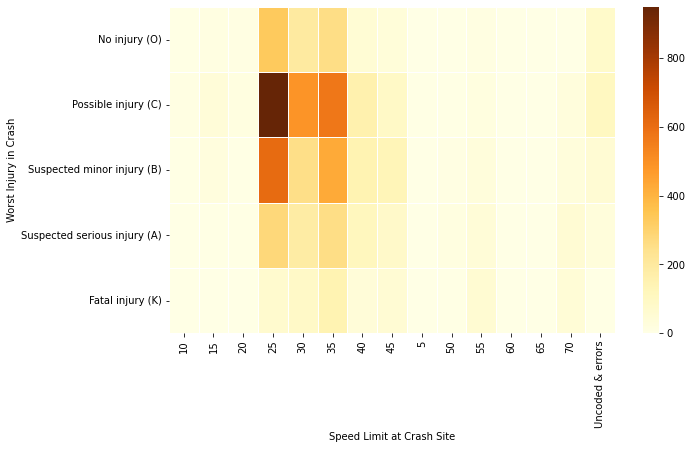

In [59]:
# Speed Limit compared to Injury Severity
col1 = 'Worst Injury in Crash'
col2 = 'Speed Limit at Crash Site'

df3 = file.groupby([col1, col2]).size()
df3 = pd.DataFrame(df3).reset_index()
df3 = df3.rename(columns={0: "count"})
df3 = df3.pivot(index=col1, columns=col2, values='count')

categories = ["No injury (O)", 
              "Possible injury (C)", 
              "Suspected minor injury (B)", 
              "Suspected serious injury (A)", 
              "Fatal injury (K)"]

df3.index = pd.CategoricalIndex(df3.index, categories = categories)
df3.sort_index(level=0, inplace=True)
df3 = df3.fillna(0)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df3, cmap = 'YlOrBr', linewidth=1, linecolor='w')

Male      2905
Female    1993
Name: Person Gender, dtype: int64
[2905, 1993]


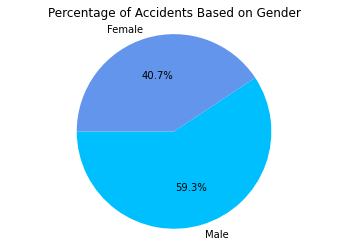

In [21]:
# Gender Pie Chart
gender_count = file['Person Gender'].value_counts()
print(gender_count)

labels = ['Male', 'Female']
values = list(gender_count)
print(values)
colors = ['deepskyblue', 'cornflowerblue']

plt.title('Percentage of Accidents Based on Gender')
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

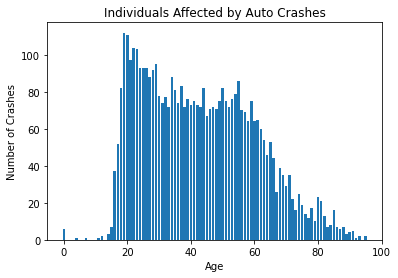

In [23]:
import numpy as np
import seaborn as sns

# replace 'less than 1 year old' with 0
file['Person Age'] = file['Person Age'].astype(str).str.replace('Less than 1 year old', '0')

# create copy of file
no_dob = file 

# drop 'DOB invalid'
no_dob.drop(no_dob.loc[no_dob['Person Age']=='DOB invalid'].index, inplace=True)
sort = no_dob['Person Age'].sort_values()
age_count = sort.value_counts(sort=True)

# find mean age without 'DOB invalid'
length = len(age_count)
avg = round(int(age_count.sum()) / length)

# replace 'DOB invalid' with the mean age in the original file
file['Person Age'] = file['Person Age'].astype(str).str.replace('DOB invalid', str(avg))
file['Person Age'] = file['Person Age'].astype('int')

true_age = file['Person Age'].value_counts()
true_age = true_age.to_dict()

x = true_age.keys()
y = true_age.values()

plt.bar(x,y)

plt.xlabel("Age")
plt.ylabel("Number of Crashes")
plt.title("Individuals Affected by Auto Crashes")
plt.show()